#  DBSCAN - 밀도기반 클러스터링
(Density Based Spatial Clustering of Application with Noise)
K Means나 Hierarchical 클러스터링의 경우 군집간의 거리를 이용하여 클러스터링을 하는 방법인데, 밀도 기반의 클러스터링은 점이 세밀하게 몰려 있어서 밀도가 높은 부분을 클러스터링 하는 방식이다.

쉽게 설명하면, 어느점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식이다.

먼저 점 p가 있다고 할때, 점 p에서 부터 거리 e (epsilon)내에 점이 m(minPts) 개 있으면 하나의 군집으로 인식한다고 하자. 이 조건 즉 거리 e 내에 점 m개를 가지고 있는 점 p를 core point (중심점) 이라고 한다.

DBSCAN 알고리즘을 사용하려면 기준점 부터의 거리 epsilon값과, 이 반경내에 있는 점의 수 minPts를 인자로 전달해야 한다.

* core point : minPts = 4 라고 하면, 점 P를 중심으로 반경 epsilon 내에 점이 4개 이상 있으면 하나의 군집으로 판단할 수 있다.  이 때 점 P는 core point가 된다.
* border point : epsilon이내에 minPts보다 이웃이 적지만 다른 core point 반경 안에 있으면 경계 샘플(border point)가 된다.
* noise point : core point, border point가 아닌 모든 샘플은 잡음 샘플(noise point)이다.



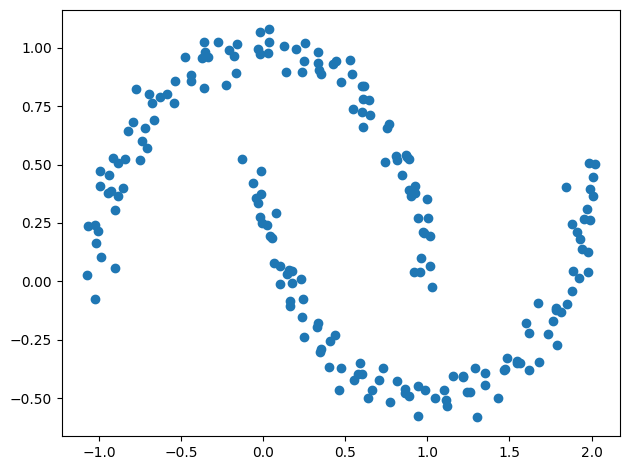

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

### K-means, Hierarchical 군집 방법의 한계
비선형적 구분 경계를 가지는 군집을 분리하지 못한다.

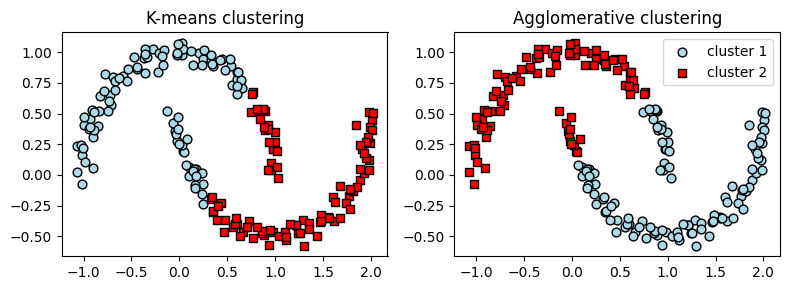

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
# K-means방법
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

# hierarchical 방법
ac = AgglomerativeClustering(n_clusters=2,
                             metric='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

## DBSCAN
군집의 갯수를 미리 정할 필요가 없고, 비선형적 경계를 가진 군집을 잘 구분하여 군집을 생성할 수 있다. 노이즈에 강한 장점이 있다.

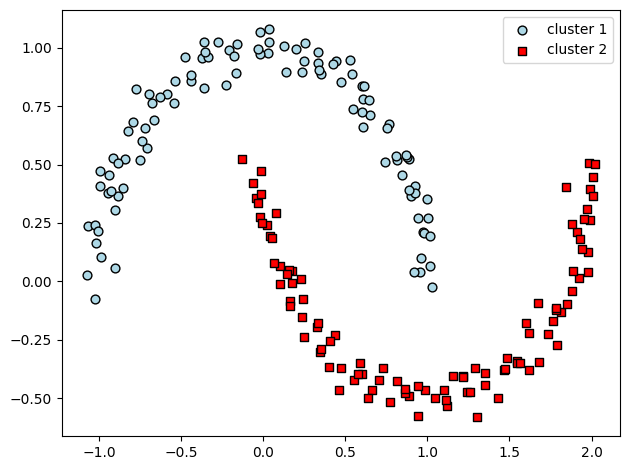

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black',
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.8, min_samples=5)
predict = model.fit_predict(X_scaled)

In [ ]:
predict

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

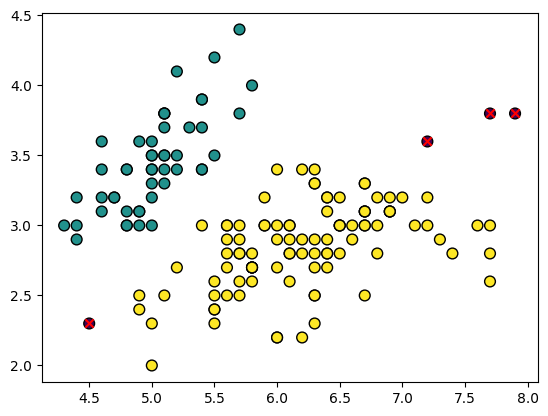

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=predict, s=60, edgecolors='black')
plt.scatter(X[predict==-1,0], X[predict==-1,1], c='red',marker='x') # 군집에 포함되지 않는 outlier
plt.show()

### DBSCAN 주요 파라미터

* eps : 가까운 포인트의 범위를 설정함. eps가 너무 작으면 핵심 포인트가 생성되지 않고 모두 잡음으로 분류된다. eps가 아주 크면 모두 하나의 클러스터가 된다. eps를 조절하므로 간접적으로 군집의 수가 정해지게 된다.

* min_samples : 덜 조밀한 지역이 잡음 포인트가 될지를 결정함. min_samples 갯수보다 덜 모여 있는 지역은 잡음이 된다.



# 실습

1. sklearn의 wine 데이터를 다음과 같이 읽어들이시오.
```
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target
```
2. 읽어들인 데이터에 대해서 스케일링을 수행하시오.
3.  DBSCAN Clustering을 수행하고 결과를 확인하시오.